<a href="https://colab.research.google.com/github/safina57/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation using KMeans Clustering

This script performs mall customer segmentation using KMeans clustering on a dataset containing customer's information

## Steps:
1. **Load and preprocess the data**: Read the data from a CSV file, and select relevant features for clustering.
2. **Perform KMeans clustering**: apply KMeans clustering to segment the customers.
3. **Visualize the clusters**: Create an interactive 3D scatter plot to visualize the clusters.

#Importing Libraries

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings

warnings.filterwarnings("ignore")

#Data Exploration

In [22]:
data=pd.read_csv('/content/drive/MyDrive/ML_data/Customer Segmentation/Mall_Customers.csv')

In [23]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
data.shape

(200, 5)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

we have a clean data with 200 example, 5 features and 0 missing values

#Data Visualization

In [27]:
# Set the style of the plot to a dark background
sns.set_style("whitegrid")

# Customize the seaborn style with specific colors and context settings
sns.set(rc={
    "axes.facecolor": "#f2e5ff",  # Set the face color of the axes to a light violet
    "figure.facecolor": "#f2e5ff",  # Set the face color of the entire figure to a light violet
    "grid.color": "#e0c3ff"  # Set the color of the grid lines to a soft violet
})

# Set the context to "poster" size with a specific font scale
sns.set_context("poster", font_scale=0.7)

# Define custom color palettes for seaborn plots
palette = ["#8a2be2", "#9370db", "#ba55d3", "#dda0dd", "#ee82ee"]
palette_cmap = ["#9370db", "#ba55d3", "#8a2be2", "#dda0dd", "#ee82ee"]

# Display the color palettes using seaborn
# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()


In [28]:
def Categorical_Features_Visulatisation(data,feature):

  """
    Visualizes the distribution of a categorical feature in the dataset using a count plot.

    Parameters:
    - data : DataFrame
        The dataset containing the categorical feature.
    - feature : str
        The name of the categorical feature to visualize.

    Returns:
    - None
        Displays the plot showing the distribution of the categorical feature.
  """

  # Create a new figure with specified size
  fig = plt.figure(figsize=(10, 5))

  # Create a count plot with the new palette
  p = sns.countplot(y=feature, data=data, palette=palette[1:3], edgecolor='#4b0082', linewidth=2, width=0.7)

  # Add text on top of the bars
  for container in p.containers:
      p.bar_label(container, label_type="center", color='#4b0082', fontsize=17, weight='bold', padding=6,
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#f2e5ff", "edgecolor": '#4b0082', "linewidth": 2, "alpha": 1})

  # Set the title and labels with appropriate colors and styles
  plt.title(f"Distribution of {feature} in Data", color="#4b0082", fontsize=20, weight='bold')
  plt.xlabel("Count", color="#4b0082", fontsize=16)
  plt.ylabel(feature, color="#4b0082", fontsize=16)

  # Show the plot
  plt.show()

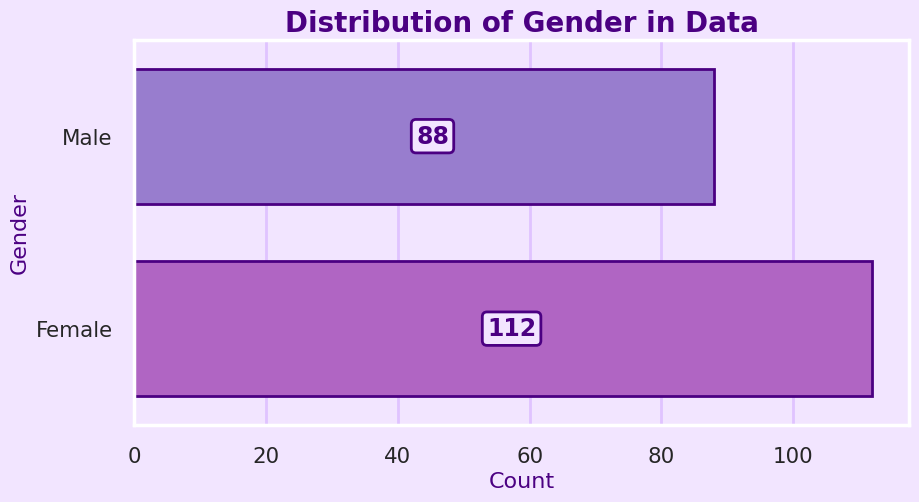

In [29]:
Categorical_Features_Visulatisation(data=data,feature='Gender')

In [69]:
def Numerical_Feature_Visualization(data,feature):

  """
    Visualizes the distribution of a numerical feature in the dataset using a histogram with KDE and markers for mean and median.

    Parameters:
    - data : DataFrame
        The dataset containing the numerical feature.
    - feature : str
        The name of the numerical feature to visualize.

    Returns:
    - None
        Displays the plot showing the distribution of the numerical feature with mean and median markers.
  """

  # Define custom color for the histogram and kernel density estimate
  hist_color = "#8a2be2"  # Blue violet
  line_color = "#4b0082"  # Indigo
  mean_line_color = "#ff4500"  # Orange red
  median_line_color = "#1e90ff"  # Dodger blue

  # Create a figure with specified size
  fig = plt.figure(figsize=(10, 6))

  # Create a histogram with the violet theme colors
  histplot = sns.histplot(data=data, x=feature, bins=20, color=hist_color, edgecolor=line_color, kde=True)

  # Set the color for the kernel density line
  histplot.get_lines()[0].set_color(line_color)

  # Calculate mean and median
  mean_value = data[feature].mean()
  median_value = data[feature].median()

  # Add mean and median lines
  plt.axvline(mean_value, color=mean_line_color, linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
  plt.axvline(median_value, color=median_line_color, linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

  # Set labels and title with appropriate colors
  plt.title(f"Distribution of {feature} with Mean and Median", color=line_color, fontsize=20, weight='bold')
  plt.xlabel(feature, color=line_color, fontsize=16)
  plt.ylabel("Count", color=line_color, fontsize=16)

  # Add legend
  plt.legend()

  # Show the plot
  plt.show()


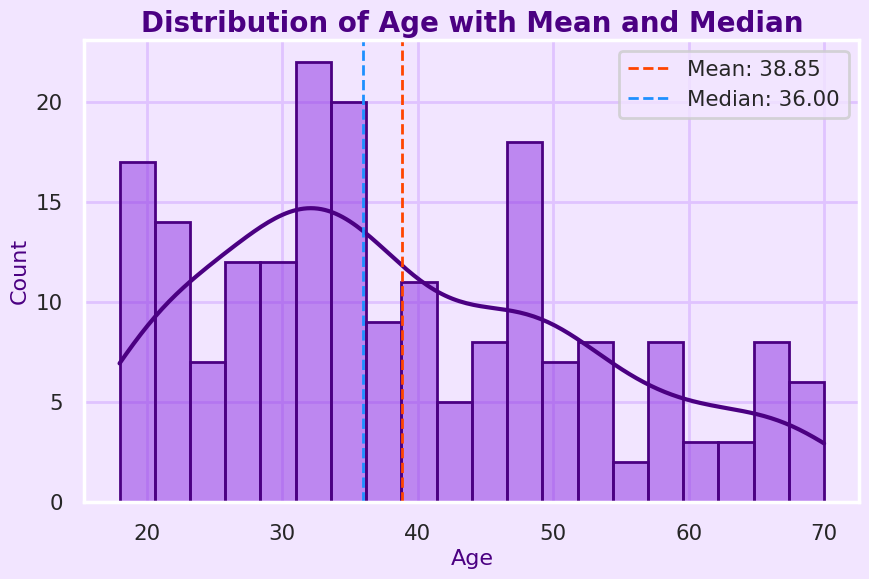

In [31]:
Numerical_Feature_Visualization(data,'Age')

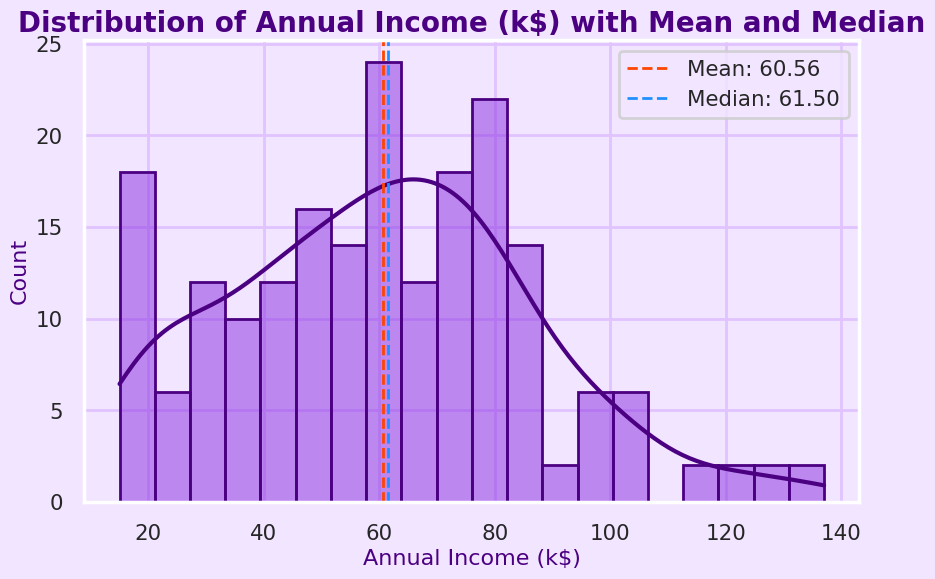

In [32]:
Numerical_Feature_Visualization(data,'Annual Income (k$)')

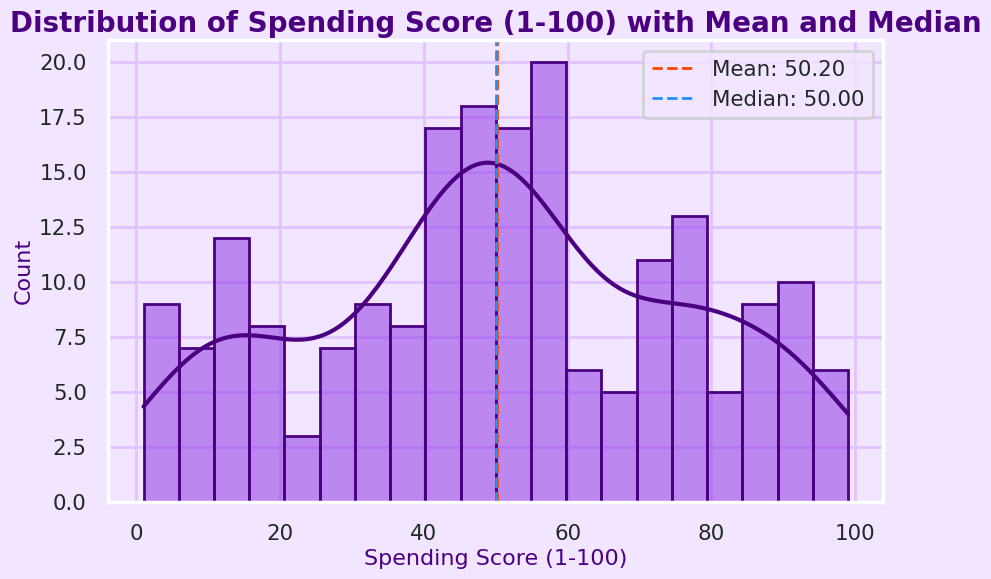

In [33]:
Numerical_Feature_Visualization(data,'Spending Score (1-100)')

In [78]:
def plot_numerical_feature_by_gender(data, feature, by='Gender'):
    """
    Visualizes the distribution of a numerical feature in the dataset by gender using histograms with KDE and markers for mean and median.

    Parameters:
    - data : DataFrame
        The dataset containing the numerical feature.
    - feature : str
        The name of the numerical feature to visualize.
    - by : str, optional
        The column name to use for grouping (default is 'Gender').

    Returns:
    - None
        Displays the plots showing the distribution of the numerical feature by gender with mean and median markers.
    """

    # Define custom colors for each gender
    colors = ['#ff6db0', '#8a2be2']  # Blue violet and Pink

    # Create a figure with specified size and two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Iterate over each gender and plot the distribution
    for i, (gender, group) in enumerate(data.groupby(by)):
        # Select the color for the current gender
        color = colors[i]

        # Create a histogram with the specified color
        histplot = sns.histplot(data=group, x=feature, bins=20, color=color, edgecolor='black', kde=True, ax=axes[i])

        # Calculate mean and median for the current gender group
        mean_value = group[feature].mean()
        median_value = group[feature].median()

        # Add mean and median lines
        axes[i].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        axes[i].axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

        # Set labels and title
        axes[i].set_title(f"Distribution of {feature} for {gender}", color="#4b0082", fontsize=20, weight='bold')
        axes[i].set_xlabel(feature, color="#4b0082", fontsize=16)
        axes[i].set_ylabel("Count", color="#4b0082", fontsize=16)

        # Add legend
        axes[i].legend()

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


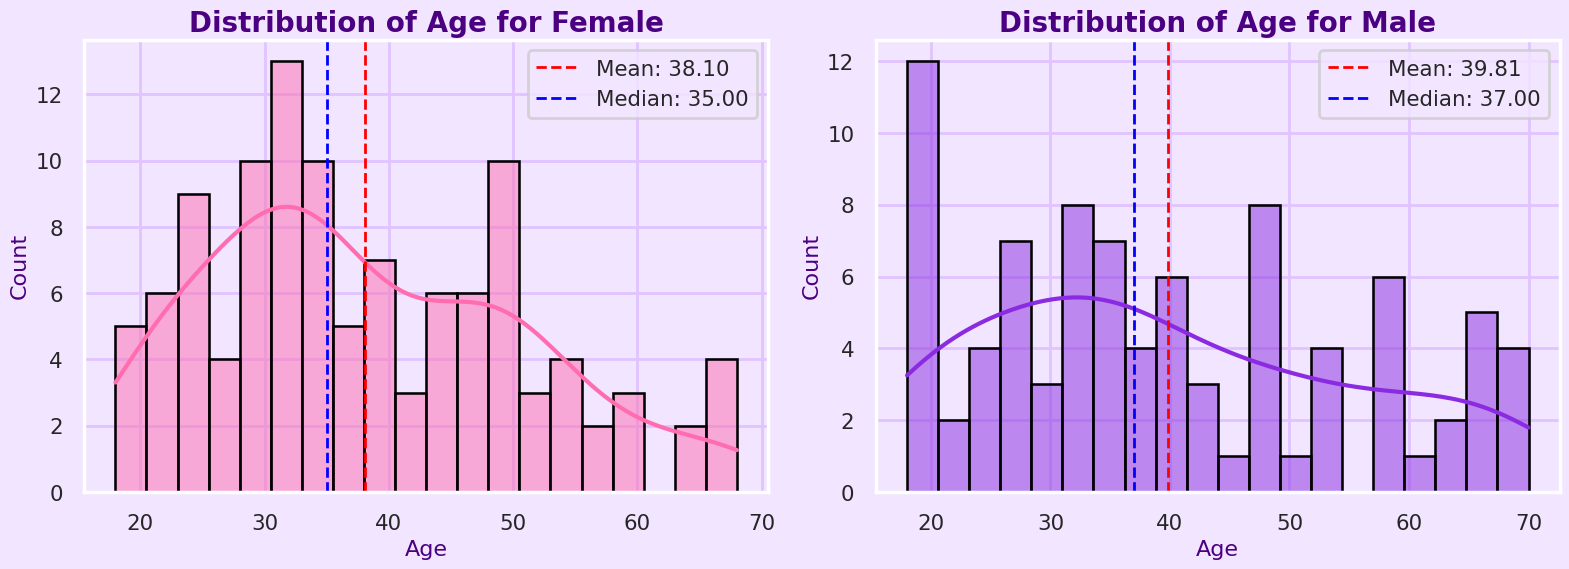

In [79]:
plot_numerical_feature_by_gender(data=data, feature='Age', by='Gender')

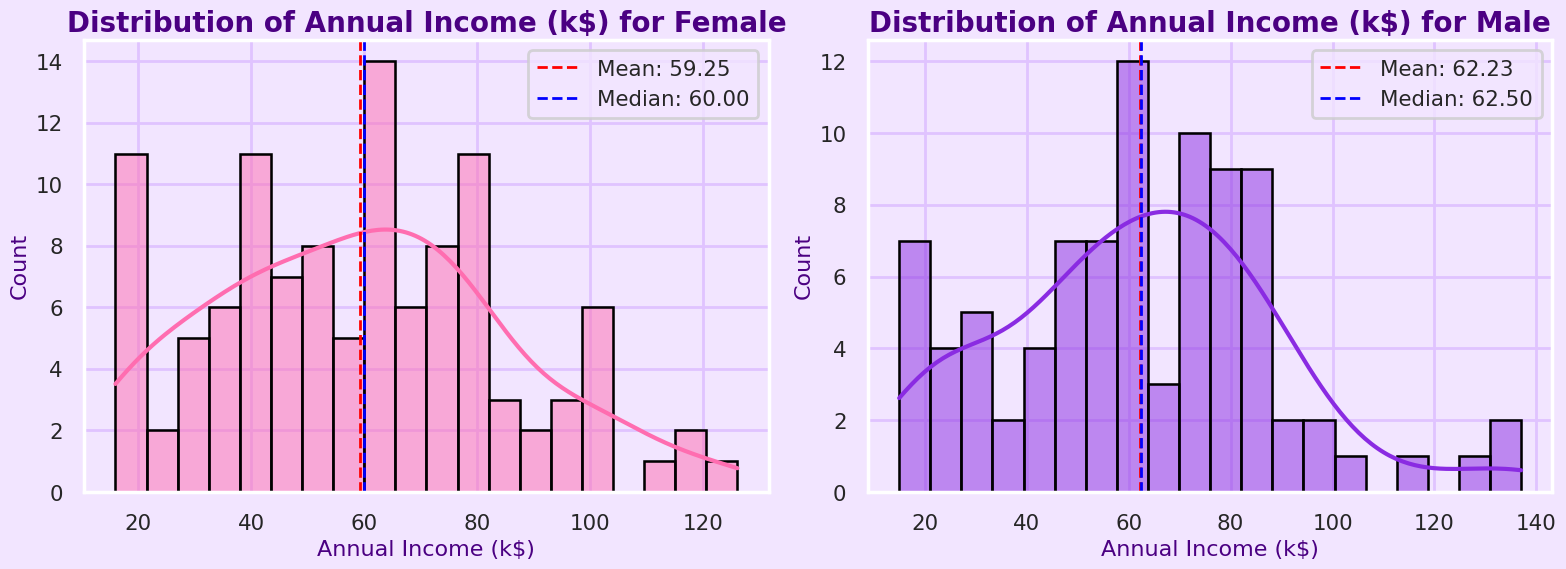

In [80]:
plot_numerical_feature_by_gender(data=data, feature='Annual Income (k$)', by='Gender')

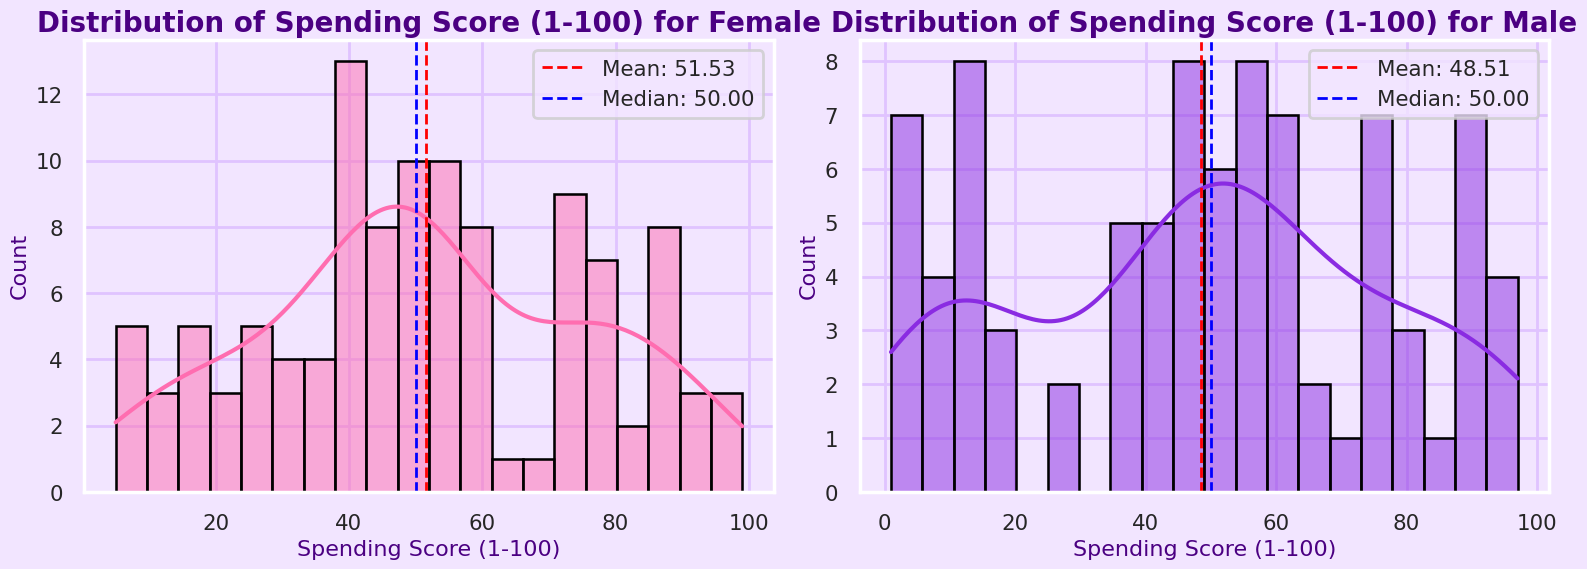

In [81]:
plot_numerical_feature_by_gender(data=data, feature='Spending Score (1-100)', by='Gender')

we will use numerical features such as `Age`, `Annual Income`, and `Spending Score`, and apply clustering algorithms to group customers based on their demographic and spending behaviors.



In [34]:
features=['Age','Annual Income (k$)','Spending Score (1-100)']

In [35]:
X=data[features]

#Clustering with K-means

### K-means Algorithm Overview

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning data into clusters. The algorithm works as follows:

1. **Initialization**:
   - Choose the number of clusters $ K $ to partition the data.
   - Initialize $ K $ centroids randomly within the data domain.

2. **Assign Data Points**:
   - Assign each data point $ \mathbf{x}_i $ to the nearest centroid $ \mathbf{c}_j $ based on a distance metric, commonly the Euclidean distance:

     $$
     j^* = \arg \min_j \| \mathbf{x}_i - \mathbf{c}_j \|_2^2
     $$

     where $ \| \cdot \|_2 $ denotes the Euclidean norm.

3. **Update Centroids**:
   - Recalculate the centroid $ \mathbf{c}_j $ of each cluster $ j $ as the mean of all data points $ \mathbf{x}_i $ assigned to that cluster:

     $$
     c_j = \frac{1}{|S_j|} \sum_{\mathbf{x}_i \in S_j} \mathbf{x}_i
     $$

     where $ S_j $ is the set of data points assigned to cluster $ j $.

4. **Repeat**:
   - Iteratively reassign data points and update centroids until convergence criteria are met (e.g., centroids do not change significantly or a maximum number of iterations is reached).

5. **Output**:
   - The algorithm outputs $ K $ clusters, where each cluster is characterized by its centroid.

### Key Points:
- K-means aims to minimize the variance within clusters (sum of squared distances from each point to its assigned centroid).
- The choice of $ K $ impacts the resulting clusters significantly and is often determined using techniques like the elbow method or silhouette analysis.
- K-means is sensitive to initial centroid selection and can converge to local optima depending on the initialization.
- It is efficient for large datasets but requires prior knowledge of the number of clusters $ K $.



In [44]:
silhouette_scores = []
wcss = []

for i in range(2, 11):
    # Initialize KMeans with n_clusters=i, using k-means++ initialization
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)

    # Fit KMeans and compute WCSS
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    # Predict cluster labels and compute Silhouette score
    cluster_labels = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

### Elbow Method

The **elbow method** is a heuristic used to determine the optimal number of clusters $ k $ in a dataset.

 It works by plotting the **within-cluster sum of squares** (WCSS) or inertia against the number of clusters.

  WCSS measures the compactness of clusters — lower WCSS indicates tighter clusters.
  
  In the plot, as $ k $ increases, WCSS typically decreases, because more clusters allow for smaller within-cluster distances.
  
  The "elbow point" on the plot, where the rate of WCSS decrease sharply slows, suggests the optimal $ k $ — the point beyond which adding more clusters provides diminishing returns in terms of explaining the variance.
  
   However, the elbow method alone may not always clearly indicate the optimal $ k $, especially in complex datasets where clusters may not have spherical shapes or equal sizes.

### Silhouette Score

The **silhouette score** measures how similar each point is to its own cluster compared to other clusters. It quantifies the quality of clustering — higher silhouette scores indicate more distinct and well-separated clusters. The silhouette score for a single data point $ i $ is computed as:

$$ s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $$

where:
- $ a(i) $ is the mean intra-cluster distance (average distance from point $ i $ to all other points within the same cluster).
- $ b(i) $ is the mean nearest-cluster distance (average distance from point $ i $ to all points in the nearest neighboring cluster that $ i $ is not a part of).

The average silhouette score across all points gives a global measure of how well the data has been clustered. Unlike the elbow method, the silhouette score provides a more nuanced evaluation by considering both cohesion (within-cluster similarity) and separation (between-cluster dissimilarity), making it effective for datasets with irregular cluster shapes or varying cluster sizes.

In practice, combining both methods can provide a more robust approach to determining the optimal number of clusters for a given dataset, ensuring more reliable clustering results.


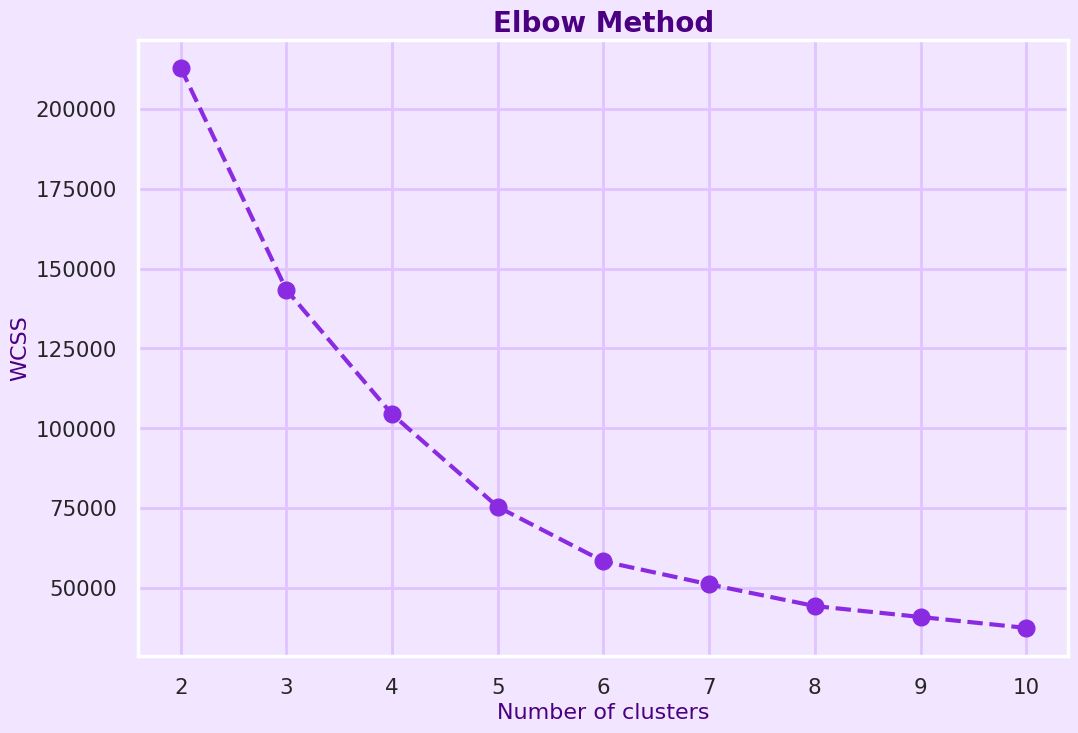

In [37]:
# Plot the Elbow method
plt.figure(figsize=(12, 8))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--', color="#8a2be2")
plt.title('Elbow Method', color="#4b0082", fontsize=20, weight='bold')
plt.xlabel('Number of clusters', color="#4b0082", fontsize=16)
plt.ylabel('WCSS',  color="#4b0082", fontsize=16)
plt.grid(True)
plt.show()

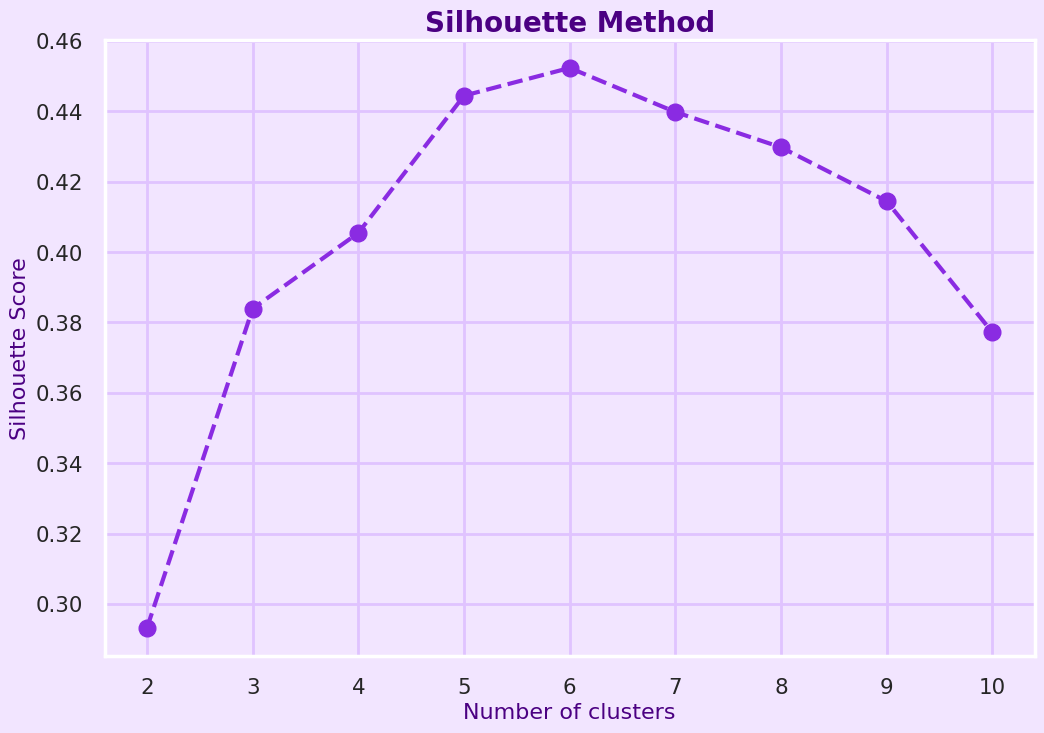

In [38]:
# Plot the Silhouette Scores
plt.figure(figsize=(12, 8))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color="#8a2be2")
plt.title('Silhouette Method', color="#4b0082", fontsize=20, weight='bold')
plt.xlabel('Number of clusters', color="#4b0082", fontsize=16)
plt.ylabel('Silhouette Score', color="#4b0082", fontsize=16)
plt.grid(True)
plt.show()

When using silhouette analysis to determine the optimal number of clusters $ K $, two main rules are considered:

1. **Silhouette Score Greater than Average**: For a particular number of clusters $ K $, all individual clusters should ideally have silhouette scores greater than the average silhouette score of the entire dataset, represented by the red-dotted line in the silhouette plot.

  Ensuring that each cluster's silhouette score is above the dataset's average indicates that the clustering is cohesive and well-separated.

2. **Consistent Cluster Sizes**: Another aspect to consider is the uniformity of cluster sizes.

 Silhouette analysis visually depicts the width of each cluster in the plot, which corresponds to the number of data points assigned to that cluster.

  Wide fluctuations in cluster sizes can indicate uneven clustering, where some clusters may be significantly larger or smaller than others. Ideally, clusters should have similar sizes, suggesting that the clustering algorithm has evenly and appropriately partitioned the data.



In [55]:
# Function to plot silhouette scores for KMeans clustering
def plot_silhouette(n_clusters, data, ax):

    """
    Plots the silhouette scores for KMeans clustering with different numbers of clusters.

    Parameters:
    - n_clusters (int): Number of clusters to fit the KMeans algorithm.
    - data (array-like): Input data to fit the KMeans algorithm.
    - ax (matplotlib.axes.Axes): Axes object to plot the silhouette plot.

    Returns:
    - None: Displays the silhouette plot on the specified axes.

    This function initializes the KMeans algorithm with the specified number of clusters,
    computes the silhouette scores for each sample, and plots a silhouette plot showing
    the silhouette coefficients for each cluster. The average silhouette score across all
    samples is also plotted as a dashed red line.
    """

    # Initialize the KMeans algorithm with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(data)

    # Compute the silhouette scores for each sample
    silhouette_vals = silhouette_samples(data, cluster_labels)
    silhouette_avg = silhouette_score(data, cluster_labels)

    y_lower, y_upper = 0, 0
    for i in range(n_clusters):
        ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_vals.sort()
        y_upper += len(ith_cluster_silhouette_vals)

        # Select color from predefined palette
        color = palette[i % len(palette)]

        # Fill silhouette plots with the silhouette values
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)

        # Label cluster numbers at the middle of each cluster's silhouette plot
        ax.text(-0.05, y_lower + 0.5 * len(ith_cluster_silhouette_vals), str(i))

        y_lower = y_upper

    # Plot the average silhouette score as a red dashed line
    ax.axvline(silhouette_avg, color="red", linestyle="--")

    # Set title and axis labels with specific colors and styles
    ax.set_title(f'Silhouette Plot for {n_clusters} Clusters', color="#4b0082", fontsize=20, weight='bold')
    ax.set_xlabel('Silhouette Coefficient Values', color="#4b0082", fontsize=16)
    ax.set_ylabel('Cluster Label', color="#4b0082", fontsize=16)


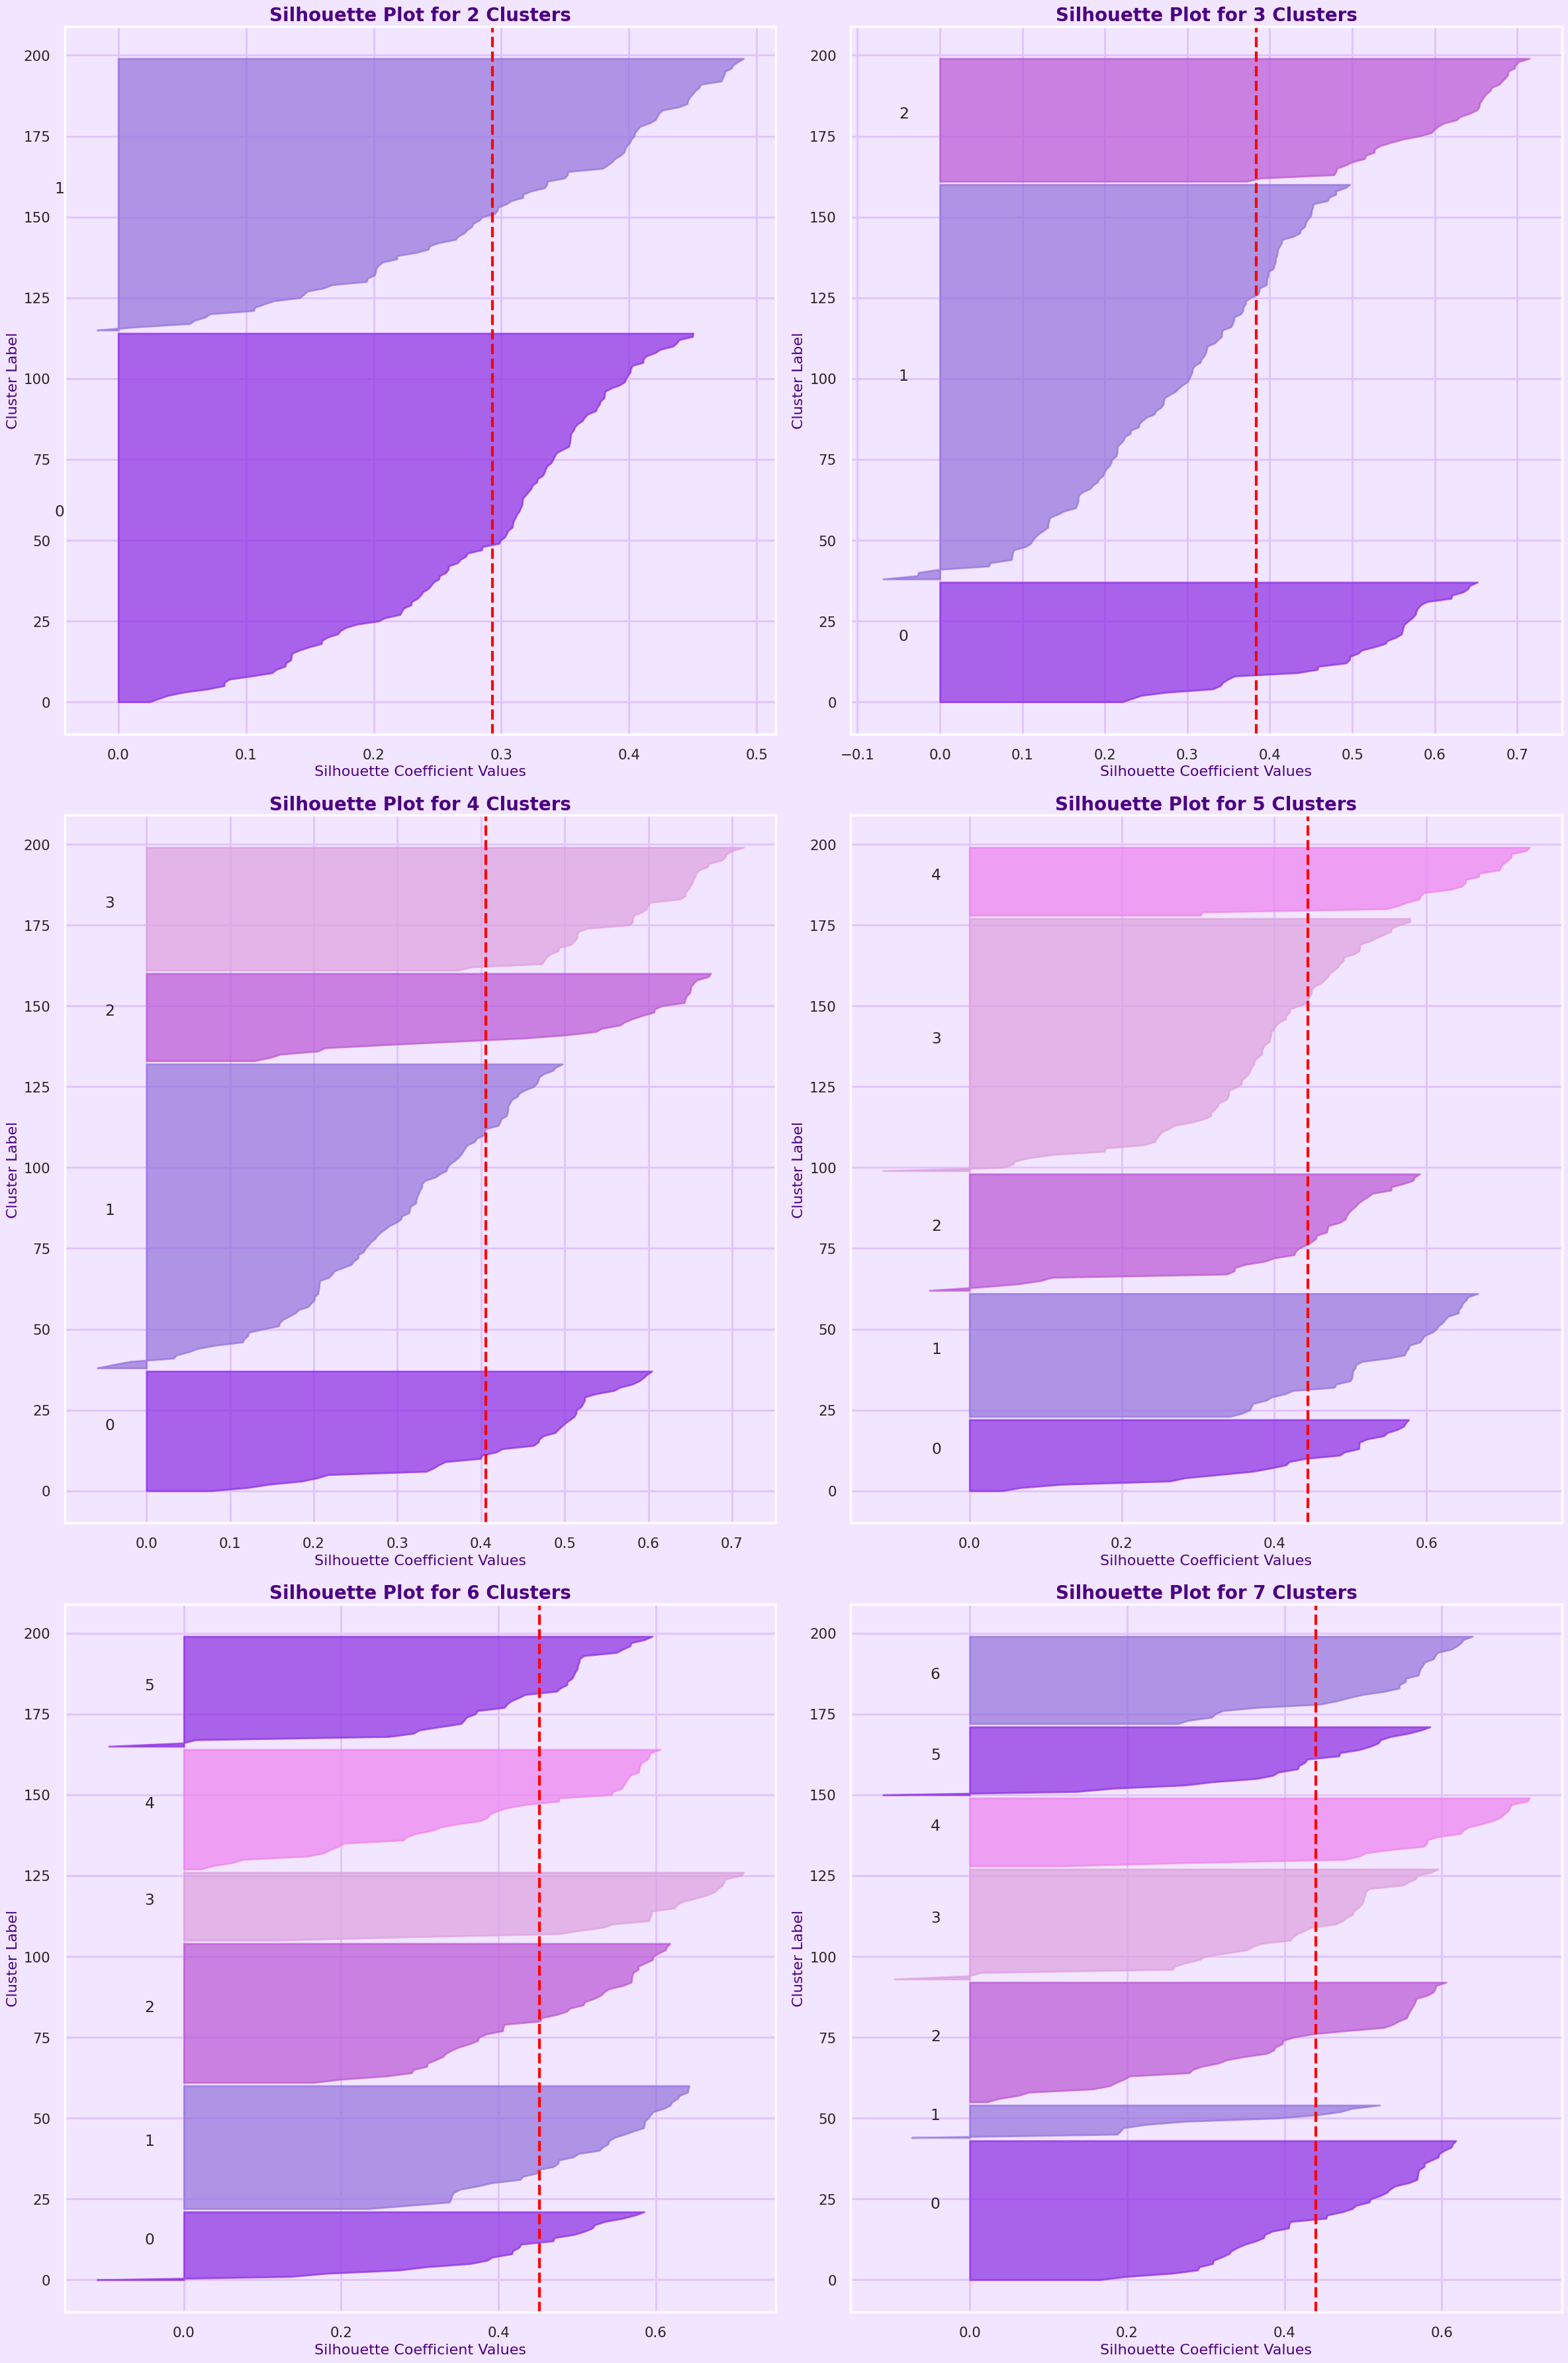

In [57]:
# Generate silhouette plots for different numbers of clusters
fig, axes = plt.subplots(3, 2, figsize=(24, 36))
axes = axes.flatten()

for i, n_clusters in enumerate(range(2, 8)):
    plot_silhouette(n_clusters, X, axes[i])

plt.tight_layout()
plt.show()

Applying silhouette analysis rules and the Elbow method suggests $ K = 5 $ as potentially optimal for clustering.

 Silhouette scores confirm each cluster's cohesion above the dataset average, while the Elbow method indicates diminishing returns in reducing within-cluster sum of squares beyond $ K = 5 $.

  This balance suggests $ K = 5 $ effectively partitions the data with cohesive clusters and balanced sizes.


In [64]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

y=kmeans.fit_predict(X)

In [66]:
# Define cluster names (replace with your specific names)
cluster_names = {
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3',
    3: 'Cluster 4',
    4: 'Cluster 5',
}

colors = ['#8a2be2', '#ee82ee', '#00bfff', '#ff6347', '#7cfc00']

# Create a DataFrame for the scaled data and clustering results
clustered_data = pd.DataFrame(X, columns=features)
clustered_data['cluster'] = [cluster_names[label] for label in y]  # Map cluster labels to names using list comprehension

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    clustered_data,
    x='Age',
    y='Annual Income (k$)',
    z='Spending Score (1-100)',
    color='cluster',
    color_discrete_sequence=colors,
    title='Customer Segmentation using KMeans Clustering'
)

# Customize the layout
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Annual Income',
        zaxis_title='Spending Score'
    ),
    legend_title_text='Cluster'
)

# Show the plot
fig.show()

K-Means algorithm generated the following 6 clusters:

1. Customers with **low** Spending rate and **low** Annual Income
2. Medium Age Customers with **high** Spending rate and **medium to high** Annual Income
3. Customers with **low** Spending rate and **medium to high** Annual Income
4. Customers with **medium** Spending rates and **medium** Annual Income
5. Young Customers with **high** Spending rate but **low** Annual Income
